In [1]:
import common
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import os

## Introdução

$$\sum_{n=0}^\infty e^x$$

In [6]:
raw = pd.read_csv("unificado.csv", na_values=["--"])

In [7]:
raw

,Long_LW_CloudFraction,Long_SW_CloudFraction,Time,XL_CloudAlbedo,XL_CloudAlbedoCorrected,XL_CloudFraction,XL_CloudFractionCorrected,TSI_CloudFraction,Lidar_CloudFraction
0,0.63,0.98,2013-12-23 16:55:00,0.453716,0.403025,0.991368,1.116058,1.000000,0.988609
1,0.54,1.00,2013-12-23 17:05:00,0.544315,0.483837,0.995370,1.119787,1.000000,0.984528
2,0.63,1.00,2013-12-23 17:15:00,0.567848,0.505165,0.995418,1.118934,1.000000,0.984528
3,0.45,0.55,2013-12-31 18:55:00,0.625907,0.564311,0.881463,0.977678,0.906810,0.427990
4,0.75,0.91,2013-12-31 19:05:00,0.666852,0.602403,0.998249,1.105047,0.881739,0.587469
5,0.38,0.86,2013-12-31 19:15:00,0.526984,0.477030,0.877642,0.969549,0.803116,0.825061
6,0.46,1.00,2013-12-31 19:25:00,0.582627,0.528527,0.960947,1.059311,0.904545,0.920823
7,0.00,0.46,2014-01-24 15:15:00,NaN,NaN,NaN,NaN,0.988708,0.368078
8,0.38,0.14,2014-02-28 16:05:00,NaN,NaN,NaN,NaN,0.947628,0.534824
9,0.68,0.79,2014-02-28 16:15:00,0.250350,0.221110,0.511220,0.578826,0.928216,0.660653


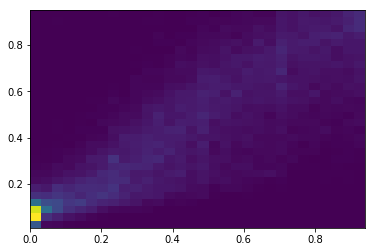

In [44]:
def hist2d(x, y):
    inds = np.isfinite(x)
    inds &= np.isfinite(y)
    inds &= x < 0.95
    inds &= y < 0.95
    x = x[inds]
    y = y[inds]
    plt.hist2d(x, y, bins=30)
    plt.show()
    
def hist(x):
    inds = np.isfinite(x)
    inds &= x < 0.99
    x = x[inds]
    plt.hist(x, bins=30)
    plt.show()
    
hist2d(raw.Long_SW_CloudFraction, raw.TSI_CloudFraction)


In [39]:
def corr(a, b):
    inds = np.isfinite(a)
    inds &= np.isfinite(b)
    aa = a[inds]
    bb = b[inds]
    return np.corrcoef(aa, bb)

In [42]:
corr(raw.Long_LW_CloudFraction, raw.TSI_CloudFraction)

array([[ 1.        ,  0.67515114],
       [ 0.67515114,  1.        ]])